In [2]:
# Add open_cp code to our system path,
#  and import tools from riskModelsGeneric

import sys
import os
import datetime
sys.path.insert(0, os.path.abspath(".."))
import riskModelsGeneric
import crimeRiskTimeTools
import geodataTools
import importlib
importlib.reload(riskModelsGeneric)
importlib.reload(crimeRiskTimeTools)
importlib.reload(geodataTools)
from riskModelsGeneric import runModelExperiments
from crimeRiskTimeTools import getSixDigitDate
from geodataTools import list_risk_model_properties, top_geojson_features, marker_cluster_from_data

print("Successfully imported modules.")

Successfully imported modules.


# Data

Choose a data directory that will contain your input and output files. (Default: "../../Data")

In that directory, you should place these files:
- Input CSV file of crime events, with these 4 columns (the expected formats can be changed as needed via additional parameters):
    - Time and date, currently expected as MM/DD/YYYY HH:MM:SS (AM/PM), as in 01/29/2001 03:36:25 PM
    - Eastings, currently expected as feet instead of meters
    - Northings, currently expected as feet instead of meters
    - Crime type, e.g. BURGLARY
    - (further columns will be ignored)
- Geojson file that will generate a polygon of the relevant region
    - For Chicago, this can be found at:
        - https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6
    - For regions of the UK, this can be made via the following process:
        - Visit https://www.ordnancesurvey.co.uk/opendatadownload/products.html
        - Scroll down to the "Boundary-Line" data, select ESRI SHAPE format, click the "Download" box, then scroll to the bottom and click "Continue".
        - After requesting the download from the next page, wait for a download link to be sent to your email, which should allow you to download a "force_kmls.zip" file full of .kml files.
        - Use the "ogr2ogr" tool to convert the relevant .kml file to .geojson, as in the following command: "ogr2ogr -f GeoJSON durham.geojson durham.kml"
        - Convert that geojson file to a new one that has a UK-specific projection (EPSG 27700); this can be done with the function convertGeojsonUKCounty in onetimeruns.py

# Set your parameters for the models here

Some default parameters for Fantasy Durham data:

In [3]:
# The following parameters are generally designed for Fantasy Durham data


# Location of data file
datadir = "../../Data"

# Dataset name (to be included in names of output files)
dataset_name = "FantDur"

# Crime types, comma-separated as needed
crime_type_set = "Burglary, Vehicle crime"

# Size of grid cells
cell_width = 500

# Input csv file name
in_csv_file_name = "Fantasy-Durham-Data_std.csv"

# Geojson file
geojson_file_name = "Police_Force_Areas_December_2016_Durham_fixed.geojson"

# Of all planned experiments, earliest start of a TEST (not train) data set
# Format: YYYY-MM-DD
earliest_test_date = "2019-09-01"

# Time between earliest experiment and latest experiment
test_date_range = "1W"

# Length of training data
train_len = "4W"

# Length of testing data
test_len = "1W"

# Time step offset between different experiments
# If set to None, then test_date_step = test_len (so experiments are non-overlapping)
test_date_step = None

# Coverage rates to test, comma-separated as needed
coverage_bounds = "0.01,0.02,0.05,0.1"

# Maximum coverage rate to display in hit rate line graph, if generated
# If set to None, then default is maximum from coverage_bounds
coverage_max = "0.1"

# Predictive models to run, comma-separated as needed
models_to_run = "random,naive,ideal,phs"

# Parameter list for Random model
#  Number of different random models to generate
num_random = 1

# Parameter list for PHS model, each one comma-separated as needed
#  Atomic unit for time bandwidths
#  Time bandwidths
#  Atomic unit for distance bandwidths in meters
#  Distance bandwidths in meters
#  Weight method (classic or linear)
phs_time_units = "1W"
phs_time_bands = "4W, 6W"
phs_dist_units = "500"
phs_dist_bands = "500,1000,1500"
phs_weight = "classic"
phs_spread = "grid, continuous"

# CSV formatting parameters
# If Fantasy Durham data:
local_epsg = 27700
csv_date_format = "%d/%m/%Y"
csv_longlat = True
csv_epsg = 27700
csv_infeet = False
csv_has_header = True

print("Parameter assignment complete.")

Parameter assignment complete.


# Run experiments using various models and data subsets

This function (runModelExperiments) takes the parameters from above and runs the models with all desired parameter combinations, using training and testing data sets over sliding-window timeframes.

A csv output file will appear in the defined data directory, containing results from each model with each parameter combination on each timeframe's data set.

If only 1 data timeframe is used, heatmap visualisations will be generated, appearing below as well as in the same defined data directory.

Declaring parameters...
datadir is defined as:
..\..\Data
About to make date_range...
date_range: ['2019-09-01']
Number of experiments: 1
...declared parameters.
Obtaining full data set and region...
Total number of relevant crimes: 1788
Total number of relevant crimes in area: 1779
...obtained full data set and region.
Time taken to obtain data: 0.9632606506347656
Running experiment 1/1...
num_crimes_train: 593
num_crimes_test: 125
Making image file names for training and testing data
Training: trainmap_200113_190901_4W_1W.png
Testing: testmap_200113_190901_4W_1W.png
Saved image file: ..\..\Data\trainmap_200113_190901_4W_1W.png
Saved image file: ..\..\Data\testmap_200113_190901_4W_1W.png
model_name: random	parameter set #: 0
model_name: naive	parameter set #: 0
model_name: ideal	parameter set #: 0
width = 144
height = 105
prediction.samples :
50
Calling prediction.rebase
.
Done with prediction.rebase
newpred.xoffset :
377000
newpred.yoffset :
506000
newpred.samples :
50
width = 144
he

C:\Users\lawdfo\Documents\GitHub\PredictCode\sandbox\riskModelsGeneric.py:645: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(12,6))


Experiment timing info:
Exp #	Time
0	33.61092686653137


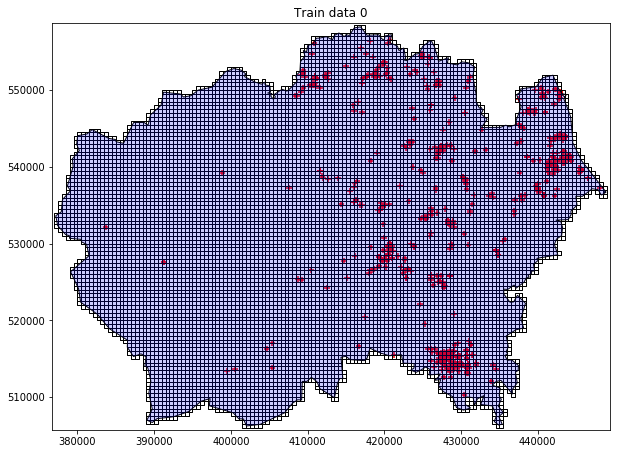

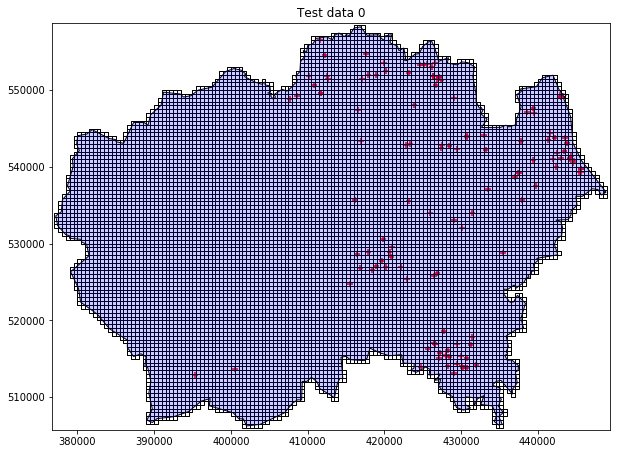

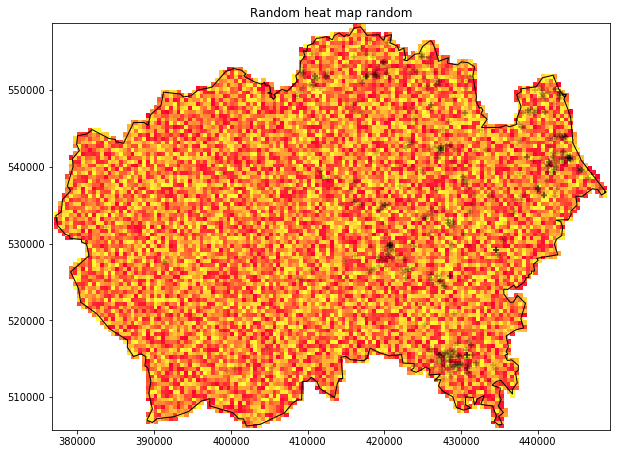

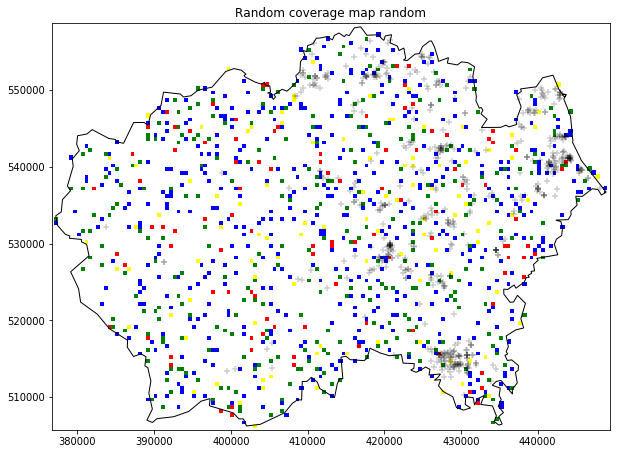

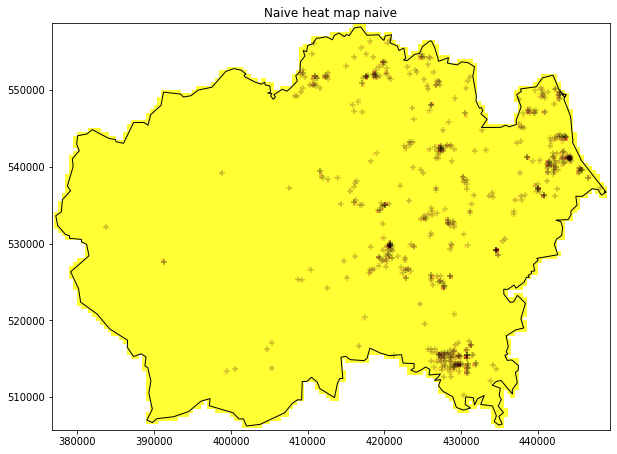

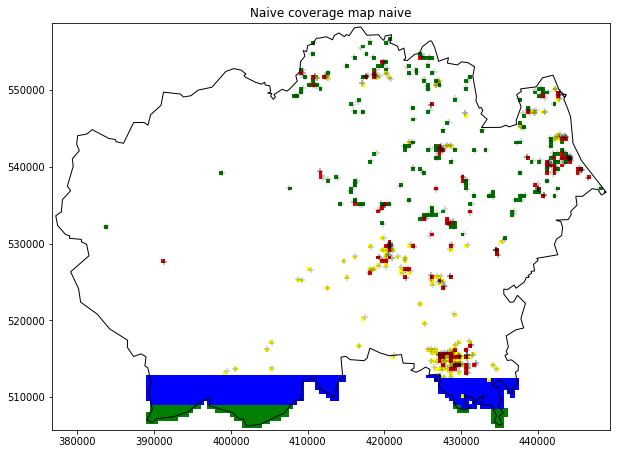

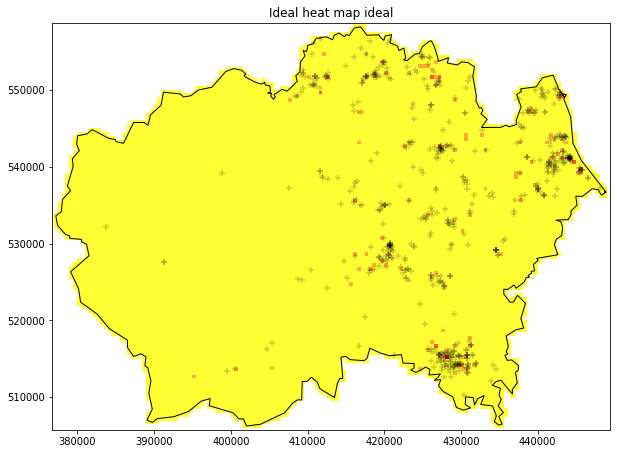

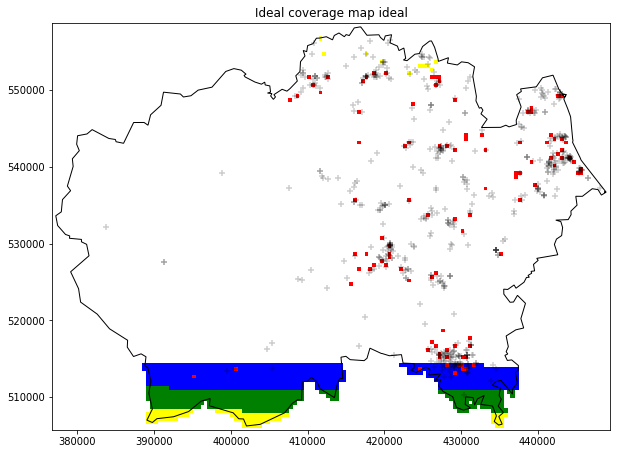

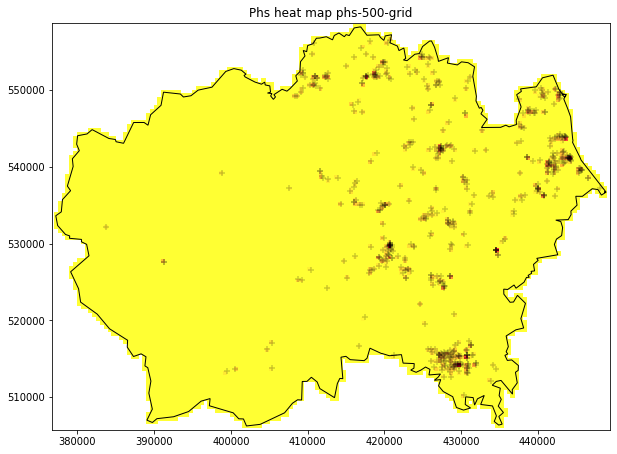

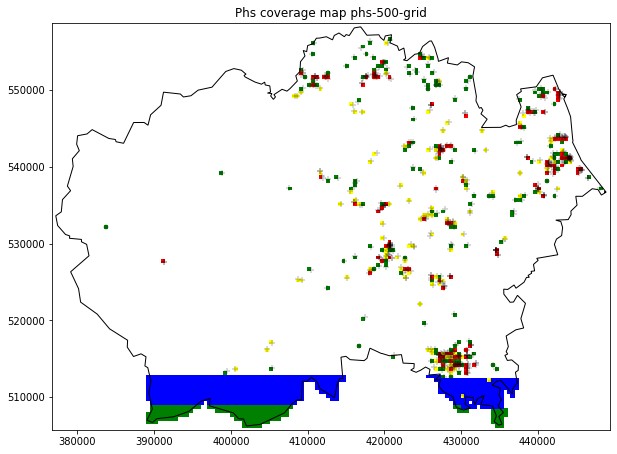

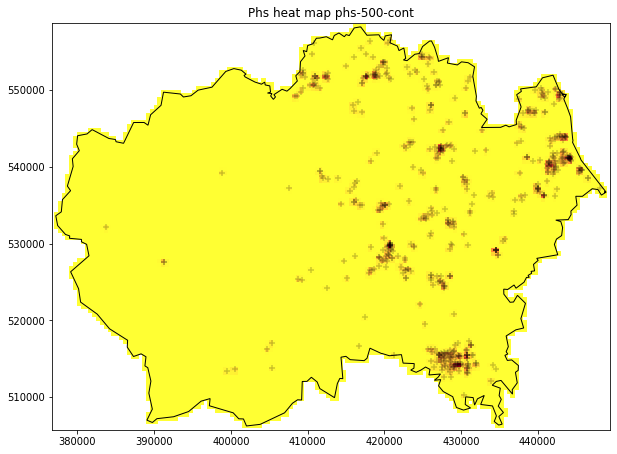

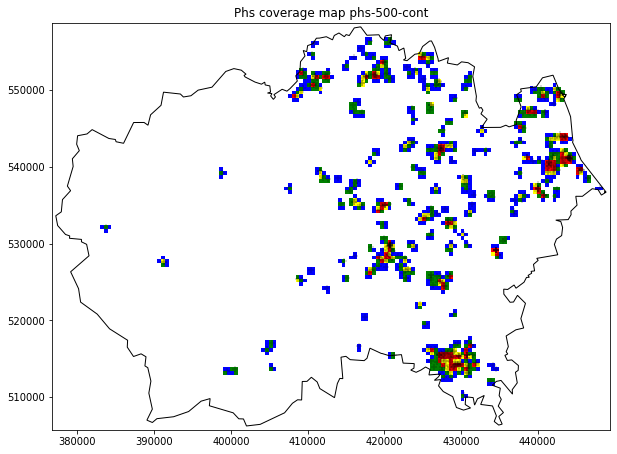

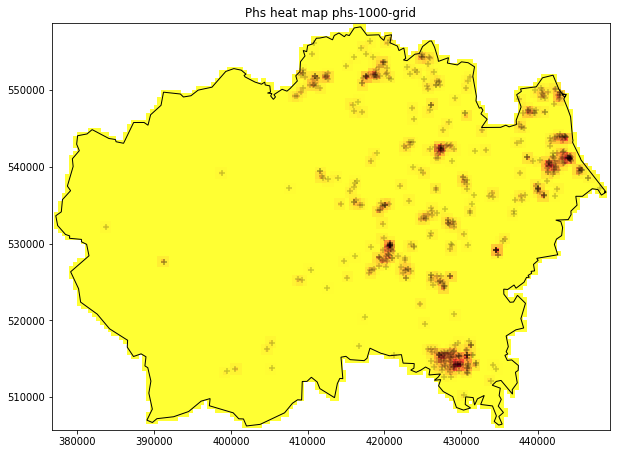

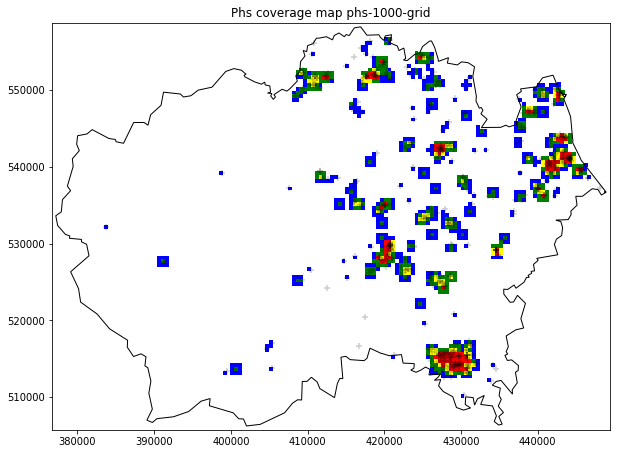

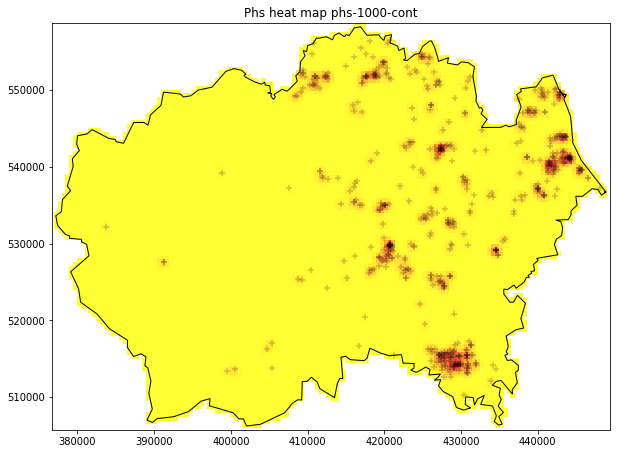

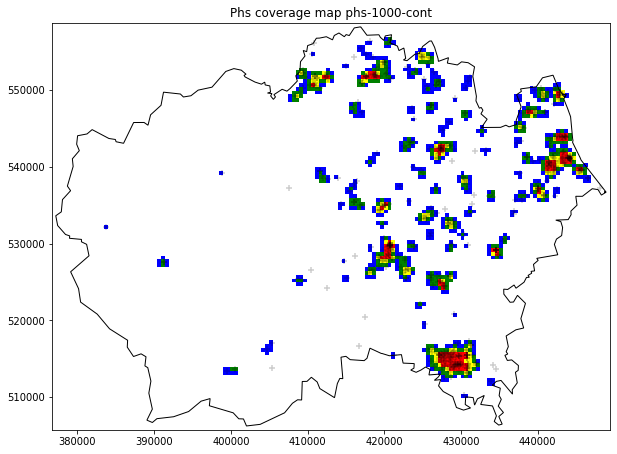

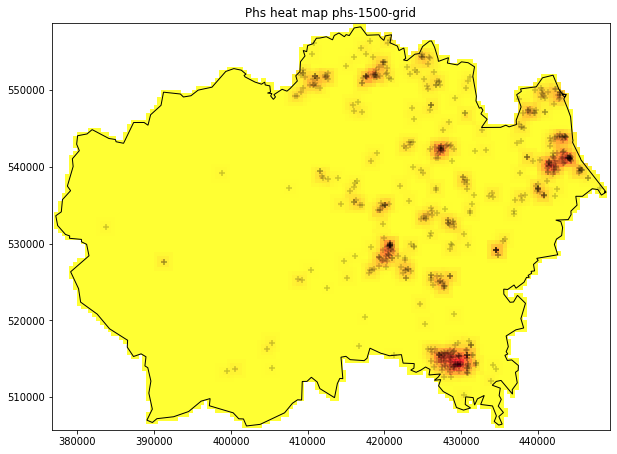

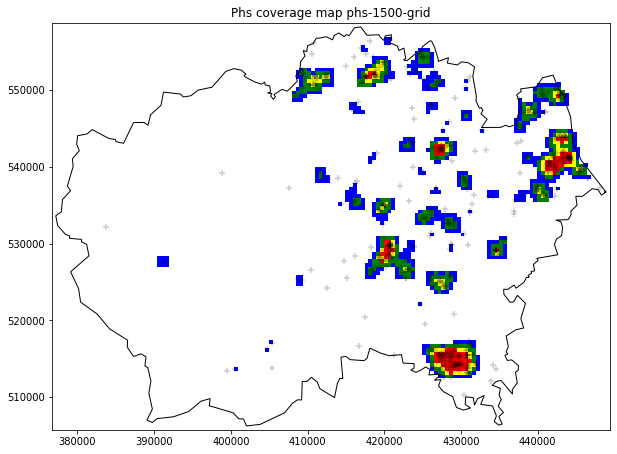

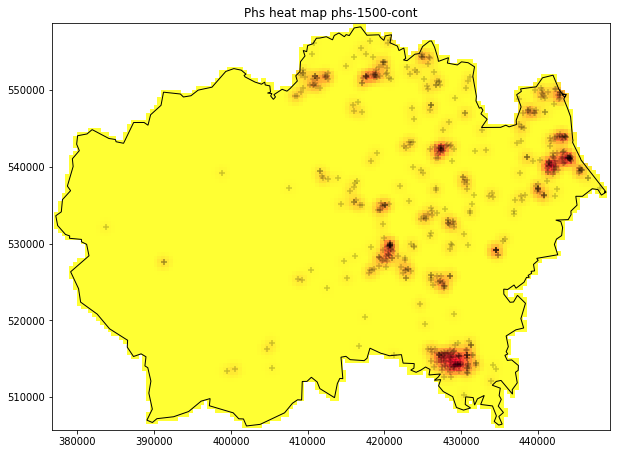

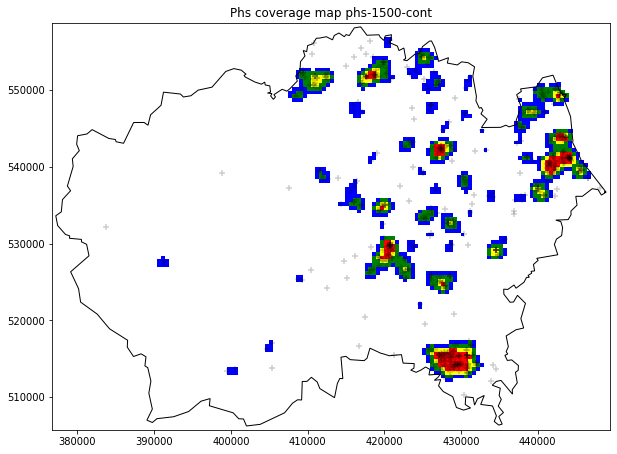

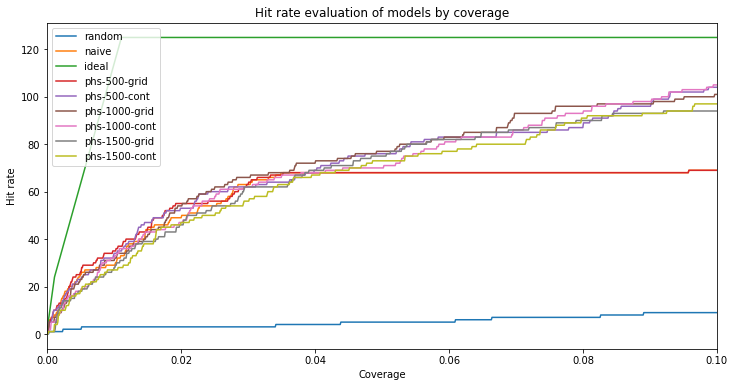

In [5]:

runModelExperiments(
        datadir_in = datadir, 
        dataset_name_in = dataset_name, 
        crime_type_set_in = crime_type_set, 
        cell_width_in = cell_width, 
        in_csv_file_name_in = in_csv_file_name, 
        geojson_file_name_in = geojson_file_name, 
        local_epsg_in = local_epsg, 
        earliest_test_date_in = earliest_test_date, 
        test_date_range_in = test_date_range, 
        train_len_in = train_len, 
        test_len_in = test_len, 
        test_date_step_in = test_date_step, 
        coverage_bounds_in = coverage_bounds, 
        models_to_run_in = models_to_run, 
        coverage_max_in = coverage_max, 
        num_random_in = num_random, 
        phs_time_units_in = phs_time_units, 
        phs_time_bands_in = phs_time_bands, 
        phs_dist_units_in = phs_dist_units, 
        phs_dist_bands_in = phs_dist_bands, 
        phs_weight_in = phs_weight, 
        phs_spread_in = phs_spread, 
        csv_date_format = csv_date_format, 
        csv_longlat = csv_longlat, 
        csv_epsg = csv_epsg, 
        csv_infeet = csv_infeet, 
        csv_has_header = csv_has_header, 
        )


# Interactive Display

After conda installing Ipyleaflet we need to enable some notebook extensions and import its functions. 

In [7]:
!jupyter nbextension enable --py --sys-prefix ipyleaflet
from ipyleaflet import *
print("Successfully imported ipyleaflet.")

Successfully imported ipyleaflet.


Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok


If you want to automatically generate the likely names of the GeoJSON output files from running the models earlier, run the following code.

(Note that this makes some assumptions, namely that you're running this code on the same day that you generated the GeoJSON files.)

In [8]:
datadir_standard = os.path.expandvars(os.path.expanduser(os.path.normpath(datadir)))
date_today_str = getSixDigitDate(datetime.date.today())
earliest_test_date_str = "".join(earliest_test_date.split("-"))[2:]
if test_date_step == None:
    test_date_step = test_len
file_name_parts = [date_today_str, \
                    dataset_name, \
                    earliest_test_date_str, \
                    test_date_range, \
                    test_date_step, \
                    train_len, \
                    test_len]
file_name_core = "_".join(file_name_parts)

# Name of GeoJson file with events to map
events_geojson = os.path.join(datadir_standard, f"train_{file_name_core}.geojson")
# Name of GeoJson file with risk scores for relevant cells
results_geojson = os.path.join(datadir_standard, f"results_{file_name_core}.geojson")
print(f"Data file: {events_geojson}")
print(f"Results file: {results_geojson}")


Data file: ..\..\Data\train_200113_FantDur_190901_1W_1W_4W_1W.geojson
Results file: ..\..\Data\results_200113_FantDur_190901_1W_1W_4W_1W.geojson


Alternatively, you can declare the full paths and names of those GeoJSON files yourself, here.

In [ ]:
# Name of GeoJson file with events to map
events_geojson = "MY_DATA_DIR/MY_DATA_FILE.geojson"
# Name of GeoJson file with risk scores for relevant cells
results_geojson = "MY_DATA_DIR/MY_RESULTS_FILE.geojson"

Read in the data from those GeoJSON files here:

In [9]:
with open(events_geojson) as eg:
    datapoints = json.load(eg)
with open(results_geojson) as cg:
    cell_results = json.load(cg)

This displays a list of properties from the results GeoJSON that can be selected for visualization:

In [10]:
print('Properties available to visualize as "property_to_map":\n')
for p in list_risk_model_properties(results_geojson):
    print(p)

Properties available to visualize as "property_to_map":

random-score
random-rank
naive-score
naive-rank
ideal-score
ideal-rank
phs-500-grid-score
phs-500-grid-rank
phs-500-cont-score
phs-500-cont-rank
phs-1000-grid-score
phs-1000-grid-rank
phs-1000-cont-score
phs-1000-cont-rank
phs-1500-grid-score
phs-1500-grid-rank
phs-1500-cont-score
phs-1500-cont-rank


Name the property you want to examine here, along with other parameters:

In [13]:
# The property you want to map from the results file
property_to_map = "phs-1500-cont-score"

# The top proportion of cells you want to highlight
highlight_portion = 0.01

# The style of highlighted cells
highlight_cell_style = {'color':'blue',
                        'weight':1.5,
                        'fillColor':'transparent',
                       }

# Whether you want to plot the events from the training data
#  Choose from:
#   "none"    : Do not display the events
#   "point"   : Each event is a slightly transparent black circle
#   "cluster" : Multiple events cluster together as single circles,
#                 changing at different zoom levels
show_training_events = "cluster"

Create the map:

In [14]:
# Instantiate a map centred at Durham
#m = Map(center=[54.776100, -1.573300], zoom=10)
m = Map(center=[54.75, -1.573300], zoom=9)

# Obtain relevant scores from GeoJSON file
score_mapping = dict()
for feat in cell_results['features']:
    score_mapping[feat['id']] = feat['properties'][property_to_map]


# Create map layer with color-coded cells reperenting risk scores
from branca.colormap import linear
layer = Choropleth(
    geo_data=cell_results,
    choro_data=score_mapping,
    colormap=linear.YlOrRd_04,
    border_color='transparent',
    style={'fillOpacity': 0.8})
m.add_layer(layer)


# Create map layer with circles reperenting crime events
if show_training_events != None:
    show_training_events = show_training_events.lower()
    if show_training_events not in ["false","no","none"]:
        if show_training_events == "point":
            with open(events_geojson) as eg:
                datapoints = json.load(eg)
            geojson_datapoints = GeoJSON(data=datapoints, point_style={'color': 'transparent', 'fillColor': 'black', 'radius': 5})
            m.add_layer(geojson_datapoints)
        elif show_training_events == "cluster":
            cluster_datapoints = marker_cluster_from_data(events_geojson)
            m.add_layer(cluster_datapoints)


# Create map layer that highlights top-scoring cells
top_cells_frame = top_geojson_features(results_geojson, property_to_map, highlight_portion)
top_cells_layer = GeoData(geo_dataframe = top_cells_frame,
                         style = highlight_cell_style)
m.add_layer(top_cells_layer)


# Display the map
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …